In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale 

In [2]:
forestfires = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Support Vector Machines/forestfires.csv")

In [3]:
forestfires


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
forestfires['month'] = forestfires['month'].astype('category')
forestfires['day'] = forestfires['day'].astype('category')
forestfires['size_category'] = forestfires['size_category'].astype('category')

                     

In [8]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2586BC1F0>,
      dtype=object)

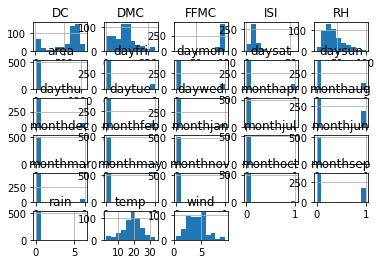

In [28]:
forestfires.hist()

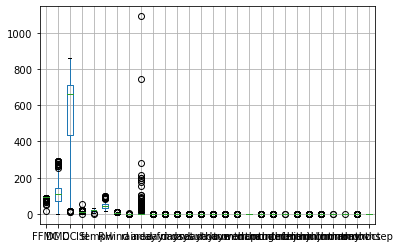

In [29]:
forestfires.boxplot()

In [9]:
predictors = forestfires.iloc[:,0:30]
target = forestfires.iloc[:,30]

In [10]:
target

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: category
Categories (2, object): [large, small]

In [17]:
predictors = pd.get_dummies(predictors)

In [18]:
predictors



,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
fires = norm_func(predictors)

In [21]:
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

In [23]:
np.mean(pred_test_linear==y_test)

0.9769230769230769

In [24]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 97.6923076923077


array([[33,  2],
       [ 1, 94]], dtype=int64)

In [25]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [26]:
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test)

0.7538461538461538

In [27]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)

0.7384615384615385